# Rohan Ponramesh

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

![xkcd](https://imgs.xkcd.com/comics/machine_learning_2x.png)

____

## Problem 1: Inverting a Matrix By Hand (10pts)

I mentioned in class that we will mostly rely on Python libraries for performing linear algebra operations. Why not, isn't that why they were developed?!

However, it is also good practice to know how to do these by yourself for the simplest cases. This allows you to explore ideas without a computer and build your intuition for what the libraries are doing. We'll learn here how to invert a $2\times 2$ matrix by hand. Being able to do this by hand also gives you a test case to ensure you are using the Python libraries correctly.

Follow these steps:
1. Make a $2\times 2$ matrix $A = \begin{bmatrix} a & b \\ c & d\end{bmatrix}$ using a NumPy array (you might want to try several choices); if you don't know about these already, NumPy has [some nice functionality for creating arrays](https://numpy.org/doc/stable/user/basics.creation.html), which can be matrices, of various types.
2. Find the [determinant](https://en.wikipedia.org/wiki/Determinant) of your matrix, using:
$$ \mathrm{det}(A) = ad - cb.$$
Do this by hand, not with a library.
3. Form the inverse $A^{-1}$ with
$$A^{-1} = \frac{1}{\mathrm{det}(A)}\begin{bmatrix} d & -b \\ -c & a\end{bmatrix}.$$
Show all of your steps using $\LaTeX$ in a markdown cell.
4. Now that you have $A^{-1}$, use the rules of matrix multiplication to find the product $A^{-1}A$. Show your steps.
5. Vary the matrix $A$ and comment on anything interesting you see. For example, what would $A$ look like if its determinant were $0$? For example, make a matrix for which $b=2a$ and $d = 2c$. What does this case correspond to?

In [4]:

a = 2
b = 1
c = 3
d = 4

A = np.array([[a, b], [c, d]])
print("Matrix A:")
print(A)


Matrix A:
[[2 1]
 [3 4]]


### Step 2: Calculate the determinant of $ A $:

${det}(A) = ad - bc $

${det}(A) = (2 \times 4) - (1 \times 3) = 5$

### Step 3: Find the inverse $A^{-1}$:

$A^{-1} = \frac{1}{{det}(A)} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}$

$A^{-1} = \frac{1}{5} \begin{bmatrix} 4 & -1 \\ -3 & 2 \end{bmatrix}$

### Step 4: Calculating $ A^{-1}A $:

$ A^{-1}A = \frac{1}{5} \begin{bmatrix} 4 & -1 \\ -3 & 2 \end{bmatrix} \begin{bmatrix} 2 & 1 \\ 3 & 4 \end{bmatrix}$

### Step 5: Vary the matrix $A$:

**Case 1: Determinant is $0$**
- If ${det}(A) = 0$, it means that the matrix is singular, and its inverse does not exist. 

- For example, set $ a = 2, b = 4, c = 1, d = 2 $.

<br>

**Case 2: $b = 2a$ and $d = 2c$**

- If $b = 2a$ and $d = 2c$, the matrix $A$ becomes singular. 

- For example, set $a = 2, b = 4, c = 3, d = 6$. 

- This case corresponds to a matrix where the rows or columns are linearly dependent.



____

## Problem 2: Polynomial Regression (15pts)

We have learned that linear regression refers to fitting data to a model in which the weights appear linearly. But, the model itself need not use linear functions. The Gaussian RBFs we used were an example of that. Another very common choice is that of a polynomial. Let's code two cases in which the number of weights is and is not the same as the number of data points.

We wish to model our data with a polynomial. The data you are given is:
$$x = [-2, -0.5, 0, 1] ,$$
$$y = [0, 0.9375, 1, 3] .$$
Because you have four data points, you are tempted to use a model with four parameters, such as:
$$y = w_0 + w_1x + w_2x^2 + w_3x^3 .$$
But, you are also worried that the data may be noisy so you **also** want to fit it to only three weights. You decide that the $x^3$ term could cause large excursions that might follow the noise, so your second model is:
$$y = w_0 + w_1x + w_2x^2.$$

Using only libraries from `linalg`, fit the data to both models. Plot the data and the two resulting models.

As we have seen, the coding for this is trivial - the hard part is setting up the vectors and matrices. Slow down and be sure you understand what you are doing: this will help you set up the problem so that it is very easy. I'll give you a hint:
$$\underbrace{\begin{bmatrix} y_1\\y_2\\y_3\\y_4\end{bmatrix}}_{4\times 1} = \underbrace{\begin{bmatrix} 0\\0.09375\\1\\3\end{bmatrix}}_{4\times 1} =\underbrace{\begin{bmatrix} 1 & -2 & 4 & 8 \\ 1 & -0.5 & 0.25 & 0.125 \\\vdots  \end{bmatrix}}_{4\times 4}\underbrace{\begin{bmatrix} w_0\\w_1\\w_2\\w_3\end{bmatrix}}_{4\times 1}.$$
It is crucial that you know where this came from!! Explain in a markdown cell where I got these numbers from.

You then use Python to get the weight vector ${\bf w}$, which allows you to plot the resulting polynomial. In one case you will need to use the pseudoinverse, [the `pinv` function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html), or in [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.pinv.html#scipy.linalg.pinv), because you have more data points than weights.

If you write your code in a general way, you can also try the third model:
$$y = w_0 + w_1x.$$
Do that next.

In the world of machine learning, we would need to figure out which of these three models is the "best", a process called "_model selection_". We won't worry about it now, but I wanted you to at least be aware of the idea. A second idea I'll introduce here is "_regularization_", since it is connected. Regularization is penalizing weights that cause large excursions; here, we are doing this by hand by dropping the higher-order terms (e.g., setting $w_3=0$), thereby prohibiting predictions with large excursions.  There are very powerful techniques for automating this. There is a lot to learn from this problem other than just setting up regression problems and inverting a matrix! 🤓 In a markdown cell, comment on which model you think is best based on your plot(s) and explain your reasons. (If you take a machine learning course, you will learn powerful mathematical methods to make this judgement.)





Setting up the matrices
For the models:

$y=w_0+w_1x+w_2x^2+w_3x^3$

$y=w_0+w_1x+w_2x^2$

$y=w_0+w_1x$


<br>

$X=\begin{bmatrix} 1 & x_1 & x_1^2 & x_1^3 \\ 1 & x_2 & x_2^2 & x_2^3 \\ 1 & x_3 & x_3^2 & x_3^3 \\1 & x_4 & x_4^2 & x_4^3 \end{bmatrix} =  \begin{bmatrix} 1 & -2 & 4 & 8 \\ 1 & -0.5 & 0.25 & 0.125 \\ 1 & 1 & 1 & 1 \\1 & 3 & 9 & 27 \end{bmatrix}  $
 
$X=\begin{bmatrix} 1 & x_1 & x_1^2  \\ 1 & x_2 & x_2^2  \\ 1 & x_3 & x_3^2  \\1 & x_4 & x_4^2  \end{bmatrix} = \begin{bmatrix} 1 & -2 & 4  \\ 1 & -0.5 & 0.25  \\ 1 & 1 & 1  \\1 & 3 & 9  \end{bmatrix} $
  
$X=\begin{bmatrix} 1 & x_1  \\ 1 & x_2  \\ 1 & x_3  \\1 & x_4 \end{bmatrix} = \begin{bmatrix} 1 & -2   \\ 1 & -0.5   \\ 1 & 1  \\1 & 3  \end{bmatrix} $

and 
   
$Y=\begin{bmatrix} y_1  \\ y_2  \\ y_3  \\y_4 \end{bmatrix} = \begin{bmatrix} 0\\0.09375\\1\\3\end{bmatrix} $

The numbers given for the matrix X in the markdown cell is the polynomial values of x along the columns 

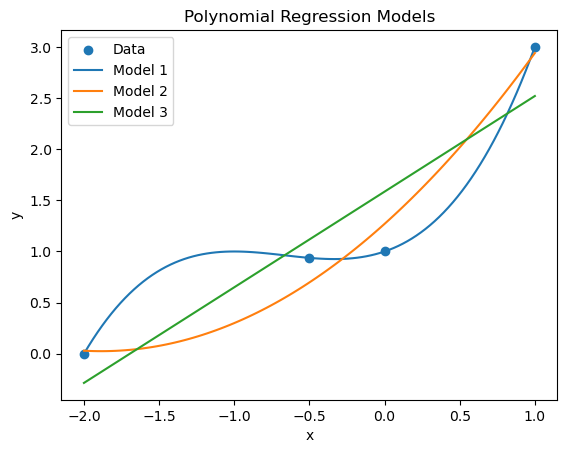

In [5]:

x = np.array([-2, -0.5, 0, 1])
y = np.array([0, 0.9375, 1, 3])

# Model 1: y = w0 + w1x + w2x^2 + w3x^3
X1 = np.column_stack([np.ones_like(x), x, x**2, x**3])
w1 = np.linalg.pinv(X1) @ y

# Model 2: y = w0 + w1x + w2x^2
X2 = np.column_stack([np.ones_like(x), x, x**2])
w2 = np.linalg.pinv(X2) @ y

# Model 3: y = w0 + w1x
X3 = np.column_stack([np.ones_like(x), x])
w3 = np.linalg.pinv(X3) @ y

# Plotting the data and models
plt.scatter(x, y, label='Data')
x_range = np.linspace(min(x), max(x), 100)

# Model 1
y_pred1 = np.polyval(np.flip(w1), x_range)
plt.plot(x_range, y_pred1, label='Model 1')

# Model 2
y_pred2 = np.polyval(np.flip(w2), x_range)
plt.plot(x_range, y_pred2, label='Model 2')

# Model 3
y_pred3 = np.polyval(np.flip(w3), x_range)
plt.plot(x_range, y_pred3, label='Model 3')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression Models')
plt.show()

**Explanation:**


Based on the plot, you can visually inspect how well each model fits the data. Model 2 (quadratic polynomial) seems to capture the trend of the data well without being overly complex. However, in a real-world scenario, we would  use techniques like cross-validation or information criteria ( for model selection. Regularization methods can also be employed to avoid overfitting in the presence of noisy data.

____

## Problem 3: Outer Product (5pts)

Given the two vectors:
$$v_1 = \begin{bmatrix} 1 \\ 2 \\ 3\end{bmatrix} \: v_2 = \begin{bmatrix} 1 \\ 1 \\ 1\end{bmatrix},$$
compute the two outer products
$$v_1 v_2^T,$$
and
$$v_2 v_1^T.$$
Do this _both_ by hand, and show your work using $\LaTeX$, and using a NumPy or SciPy library. Does the order of the vectors matter for the outer product? What about the inner product? Show and explain all of the details.




**Ans:**

Given vectors $v_1$ and $v_2$:

$$v_1 = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}$$

$$v_2 = \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}$$

#### Outer Product: $$v_1 v_2^T$$

$$v_1 v_2^T = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} \begin{bmatrix} 1 & 1 & 1 \end{bmatrix} = \begin{bmatrix} 1 & 1 & 1 \\ 2 & 2 & 2 \\ 3 & 3 & 3 \end{bmatrix}$$

#### Outer Product: \(v_2 v_1^T\)

$$v_2 v_1^T = \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix} \begin{bmatrix} 1 & 2 & 3 \end{bmatrix} = \begin{bmatrix} 1 & 2 & 3 \\ 1 & 2 & 3 \\ 1 & 2 & 3 \end{bmatrix}$$

In [6]:
#numpy implementation 
v1 = np.array([1, 2, 3])
v2 = np.array([1, 1, 1])

outer_product1 = np.outer(v1, v2)
print("Outer Product v1 v2^T:")
print(outer_product1)

outer_product2 = np.outer(v2, v1)
print("\nOuter Product v2 v1^T:")
print(outer_product2)


Outer Product v1 v2^T:
[[1 1 1]
 [2 2 2]
 [3 3 3]]

Outer Product v2 v1^T:
[[1 2 3]
 [1 2 3]
 [1 2 3]]


**Explanation:**

- The outer product $v_1 v_2^T$ results in a matrix where each element $i, j$ is the product of $v_{1_i}$ and $v_{2_j}$.

- Similarly, $v_2 v_1^T$ is the outer product of $v_2$ and $v_1$, resulting in a matrix where each element $i, j$ is the product of $v_{2_i}$ and $v_{1_j}$.

- The order of vectors matters in the outer product. In general, $v_1 v_2^T$ is not the same as $v_2 v_1^T$.

- The inner product (dot product) is different. $v_1 \cdot v_2$ is the same as $v_2 \cdot v_1$, and the order doesn't matter for the inner product.

____

## Problem 4: SVD (10pts)

Read in the iris dataset (get it from anywhere you want) and perform SVD on it [using the `linalg` library](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html). Answer these questions:
1. what does `svd` return? discuss and show with code
2. in what form does it return Σ? the full matrix? `print` what is returned
3. does `svd` return $V$ or $V^T$?
4. what does a plot of the singular values $\sigma_n$ versus $n$ look like? use both linear scale and log-linear

In [7]:
# starter code
from sklearn.datasets import load_iris
data = load_iris()

X = data.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
# 👉1. what does svd return? discuss and show with code
U, S, Vh = np.linalg.svd(X, full_matrices=False)

print("Shape of U:", U.shape)
print("Shape of Sigma:", S.shape)
print("Shape of VT:", Vh.shape)

Shape of U: (150, 4)
Shape of Sigma: (4,)
Shape of VT: (4, 4)


🤔

2. In what form does it return $\sum$? The full matrix? Print what is returned.

The $\sum$ returned by svd is a 1-D array containing the singular values in descending order. To obtain the full diagonal matrix, we need to construct it manually. The diagonal matrix will have zeros in non-diagonal entries.

In [9]:
Sigma = np.diag(S)
print("Sigma matrix returned by SVD:","\n")
print(S,"\n")
print("----------------------------------------------------------","\n")
print("Full Sigma matrix:","\n")
print(Sigma)


Sigma matrix returned by SVD: 

[95.95991387 17.76103366  3.46093093  1.88482631] 

---------------------------------------------------------- 

Full Sigma matrix: 

[[95.95991387  0.          0.          0.        ]
 [ 0.         17.76103366  0.          0.        ]
 [ 0.          0.          3.46093093  0.        ]
 [ 0.          0.          0.          1.88482631]]


 3. 🤔 Does svd return $V$ or $V^T$?

The svd function returns $V^T$ , the  Hermitian transpose of the right singular vector matrix.

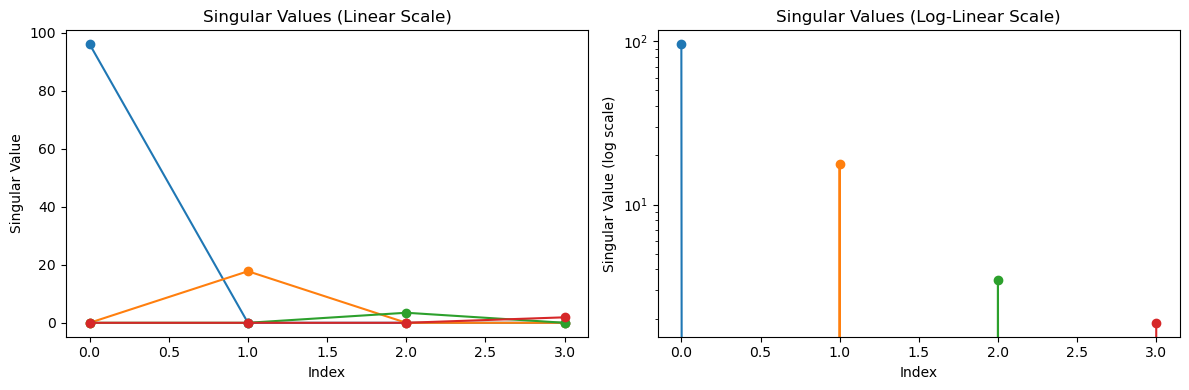

In [10]:
# 4. what does a plot of the singular values $\sigma_n$ versus $n$ look like? use both linear scale and log-linear
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(Sigma, marker='o')
plt.title("Singular Values (Linear Scale)")
plt.xlabel("Index")
plt.ylabel("Singular Value")

plt.subplot(1, 2, 2)
plt.semilogy(Sigma, marker='o')
plt.title("Singular Values (Log-Linear Scale)")
plt.xlabel("Index")
plt.ylabel("Singular Value (log scale)")

plt.tight_layout()
plt.show()


____

## Problem 5: SVD Again! (10pts)

We are going to use real (iris) data to understand the singular values a bit better. The idea is very simple: we want to take a data matrix and approximate it with a lower rank matrix, using the singular values as our guide.

If you take the SVD and write it out in terms of the columns of $U$ and $V$, which are vectors, you will find that
$$X = \sum_{i=1}^r \sigma_i {\bf u}_i {\bf v}^T_i .$$

Be sure you understand the shape of these vectors/matrices! Are these matrix multiplications, inner products, outer products? Go slowly and be sure you understand what you are looking at. Explain in your own words what is in this expression. It might help if you derive it yourself.

If we start in 2D and only use the first singular value in this sum, then the result should be...._in 1D_? Let's check!

* Take the iris dataset and choose any two columns; in fact, try all combinations of two columns.
* Plot one column versus the other.
* From those two columns, find its SVD.
* From the SVD for a new, smaller $X$ using only the $i=1$ term in that sum ($X \approx \sigma_1 {\bf u}_1 {\bf v}_1^T$).
* Add to the plot you just made the data in the new matrix. (That is, plot one column versus the other, on top of the original data using the approximate $X$ from one SV.)
* Explain what you learned from your plots.

A hint is to use the result from the outer product library you explored above. See problem 3 above.

There is one issue that could be confusing: what is ${\bf v}^T_i$? This is the $i$th column of ${\bf v}$, then transposed. It is **not** the $i$th column of $V^T$!! If it helps, [read this page](https://en.wikipedia.org/wiki/Singular_value_decomposition).


The Σ that was returned is: [53.63004331  2.97631552]


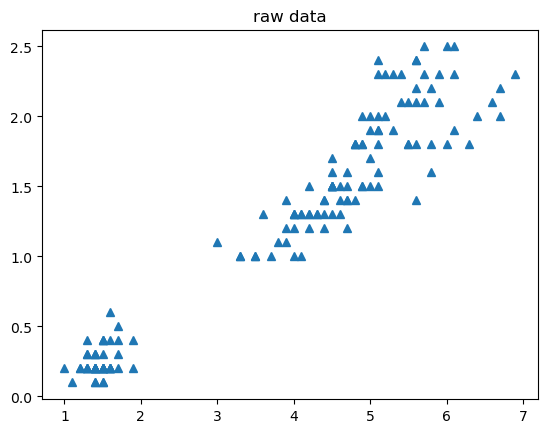

In [11]:
# starter code
from sklearn.datasets import load_iris
data = load_iris()

# choose two columns out of the four
A = data["data"][:,2:4]

# let's look at it
plt.plot(A[:,0], A[:,1], '^')
plt.title("raw data")

# perform SVD
U, S, VT = linalg.svd(A)
V = VT.T

print("The Σ that was returned is:", S)

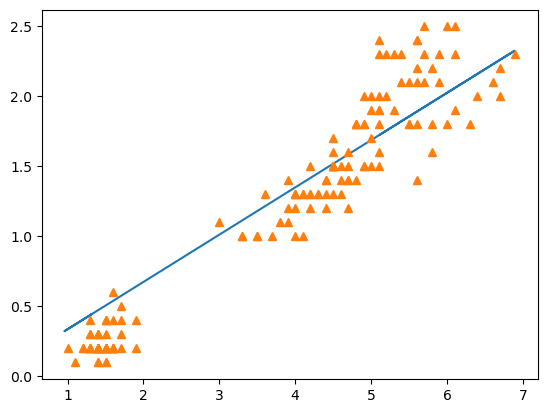

In [15]:

smaller = S[0]*np.outer(U[:,0],V[:,0])
plt.plot(smaller[:,0], smaller[:,1])
plt.plot(A[:,0], A[:,1], '^')

🤔**Explanation:**

- Approximation using the First Singular Value: The code creates a new matrix `smaller` by taking the outer product of the first left singular vector $U[:, 0]$ and the first right singular vector $V[:, 0]$, scaled by the corresponding singular value $S[0]$.

- The code then plots the new matrix `smaller` on the same plot. This represents the approximation of the original data using only the information from the first singular value. The original data points are plotted again for comparison.

- This code demonstrates the process of performing SVD on a 2D dataset, extracting the singular values and vectors, and using them to approximate the data with reduced dimensionality. The plot shows the original data points and the approximation using only the information from the first singular value.